<a href="https://colab.research.google.com/github/valesierrai/Analisis-Supervisado-para-el-AD/blob/main/Modelos_de_Regresi%C3%B3n_Regularizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelos de Regresión Regularizados

La regulazación es una estrategia para reducir la complejidad de los modelos a través del control del tamaño de sus coeficientes. En el caso de la regulación **lasso** o $L_1$, se anulan algunos coeficientes, mientras que en **Ridge** o $L_2$ se le asignan valores muy pequeños.

In [ ]:
#Importamos Librerias Iniciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

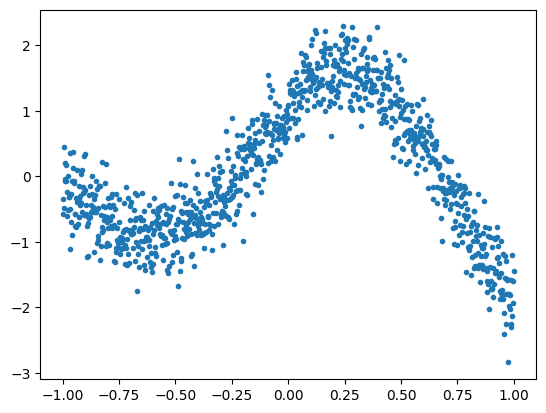

In [ ]:
#Para ejemplificar, trabajaremos con el toyset de la regresión lineal

#Predictora
X= np.linspace(-1,1,1000)
ruido= np.random.normal(0,0.333, 1000)

#Variable a predecir
y= np.sin(4*X) + np.cos(3*X) + ruido

#Graficamos el toyset
plt.plot(X,y, '.');

In [ ]:
#Vamos a ajustar el modelo como lo hicimos en el caso de la regresión múltiple con el polinomio de grado 5

#Importamos las librerias adicionales
#Para la validación cruzada
from sklearn.model_selection import cross_val_score
#Para generar el pipeline de procesamiento
from sklearn.pipeline import Pipeline
#Para generar las características polinómicas
from sklearn.preprocessing import PolynomialFeatures
#Para el modelo de regresión
from sklearn.linear_model import LinearRegression

In [ ]:
#Reorganizamos las dimensiones de X
X= X.reshape(-1,1)

#Generamos el pipeline
pipe = Pipeline([('poly', PolynomialFeatures()),
 ('model', LinearRegression(fit_intercept=True))])

#Generamos los posibles grados del polinomio para que sean sintonizados
degrees = range(2,16)

#Inicializar la lista de scores (será nuestra métrica de calidad del modelo (que tan bueno es o no))
scores = []

#Inicializamos la lista del promedio de los scores
mean_scores = []

In [ ]:
#Construimos el ciclo para recorrer los hiperparámetros (en este caso solo el grado) con la validación cruzada calculando el score para cada uno de ellos

for degree in degrees:
  score = cross_val_score(estimator= pipe.set_params(poly__degree = degree),
                          X = X, y = y, cv = 5, scoring = 'neg_mean_squared_error')
  scores.append(score)
  mean_scores.append(-score.mean())

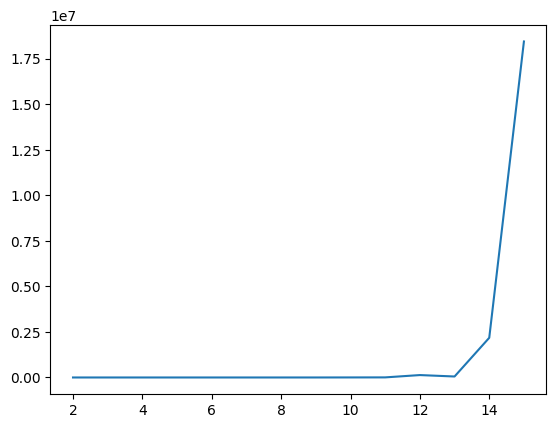

In [ ]:
#Visualizamos el resultado
plt.plot(degrees, mean_scores, '-');

In [ ]:
#Númericamente tendremos el siguiente RMSE

print(f'El mejor RMSE para el conjunto de entrenamiento es {min(mean_scores):.2f}') #la f antes de la comilla le avisa a python que va haber una variable en el print

El mejor RMSE para el conjunto de entrenamiento es 1.11


#Sintonización de Parámetros

Vamos a aplicar la regulazación al modelo para ver si mejora el desempeño. En este caso tendremos que sintonizar el parámetro $\lambda \in [0, ∞)$

## Regularizamos $L_2$ (Ridge)

In [ ]:
#Importamos librerias adicionales
from sklearn.linear_model import Ridge #para el modelo de regresión Ridge
from sklearn.metrics import mean_squared_error #para calcular el RMSE
from sklearn.model_selection import train_test_split #para dividir el conjunto de entrenamiento y prueba

In [ ]:
#Realizamos la partición de los datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    random_state= 5)

In [ ]:
#Generamos las características polinómicas ya que el grado ya está sintonizado
poly = PolynomialFeatures(degree= 5)

#Calculamos el X_train polinómico
X_train_p = poly.fit_transform(X_train)

#Instanciar el modelo
model = Ridge()

#Generamos los posibles valores de lambda (al que llamaremos alpha) para la regularización
alpha = np.logspace(-4,2)

#Creamos un diccionario con todos los hiperparámetros a sintonizar
grid = dict(alpha = alpha)

#Importamos librerías adicionales
from sklearn.model_selection import GridSearchCV

#Instanciamos la búsqueda por grid o exhaustiva
grid_search = GridSearchCV(estimator= model, param_grid = grid,
                           n_jobs= 1, cv = 5, scoring = 'neg_mean_squared_error')

#Generamos la búsqueda con el conjunto de entrenamiento
grid_result = grid_search.fit(X_train_p, y_train)

In [ ]:
#Extraemos el valor del hiperparámetro sintonizado
best_alpha = grid_result.best_params_['alpha']

#Visualizamos la información
print(f'El mejor RMSE fue de {-grid_result.best_score_:.2f}, con un lambda de {best_alpha}')

El mejor RMSE fue de 0.12, con un lambda de 0.0022229964825261957


*Ahora, evaluamos el modelo con el conjunto de test o los datos de prueba*

In [ ]:
#Tomamos el mejor modelo de la búsqueda
best_model = grid_search.best_estimator_

#Transformamos los datos de prueba a las características polinómicas
X_test_p = poly.transform(X_test)

#Aplicamos el modelo a los datos de prueba
y_pred = best_model.predict(X_test_p)

#Calculamos el RMSE
RMSE = mean_squared_error(y_test, y_pred)

#Visualizamos el resultado
print(f'El RMSE para el conjunto de prueba es {RMSE:.2f}')

El RMSE para el conjunto de prueba es 0.11


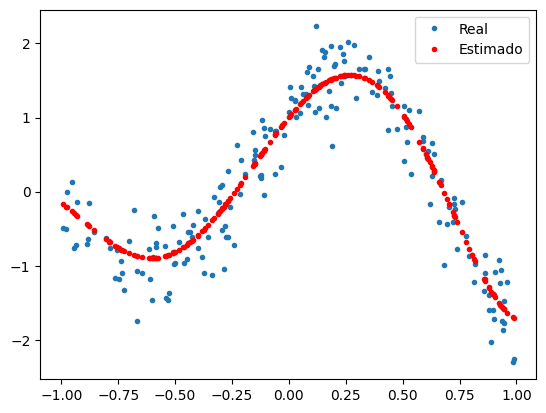

In [ ]:
#Gráficamente, tendremos:

plt.plot(X_test, y_test, '.', label = 'Real');
plt.plot(X_test, y_pred, '.r', label = 'Estimado');
plt.legend();

# Ejemplo

Cargar el archivo 'auto-mpg.data', Asigna a la scolumnas los nombres indicados en el archivo 'auto-mpg.names'. Configura como indice la variable 'car_name'.

Realiza el modelo de regresión Ridge que prediga la variable 'mpg' usando las demás variables como predictoras. Para ello realiza una predicción de los datos en subconjuntos de entrenamiento y prueba con una proporció de 70/30, usando 'random_state = 1'.

Reporta el valor de $\lambda$ encontrado, el RMSE de entrenamiento y el de prueba, y los pesos del modelo.

Repite este ejercicio con un modelo de regresión Lasso.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Cargamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

carros = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/auto-mpg.data', sep = '\s+', header = None,
                     na_values = ['?'], names = ['mpg', 'cylinders',
                                                 'displacement', 'horsepower',
                                                 'weight', 'acceleration', 'model_year',
                                                 'origin', 'car_name'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
carros.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
#Revisamos la calidad de los datos con un pequeño EDA (Análisis Exploratorio de Datos)
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
#En una tarea supervisada, la variable a predecir, debe ser la de mejor calidad. Por ello, vamos a tomar SOLO los registros para los cuales mpg sea no nulo

carros = carros[carros['mpg'].notnull()]

In [ ]:
#Dado la naturaleza del conjunto de datos es posible imputar los datos faltantes de la variable horsepower

carros['horsepower'].fillna(value = carros['horsepower'].mean(), inplace = True)

#Fijamos el index en la variable car_name
carros.set_index('car_name', inplace = True)

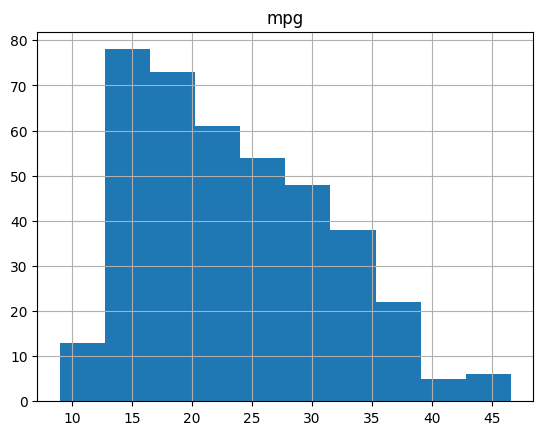

In [ ]:
#Graficamos el histograma y el diagrama de cajas y bigotes, para identificar posible datos atípicos (como primera visualización)
carros.hist(column = 'mpg')
plt.show()

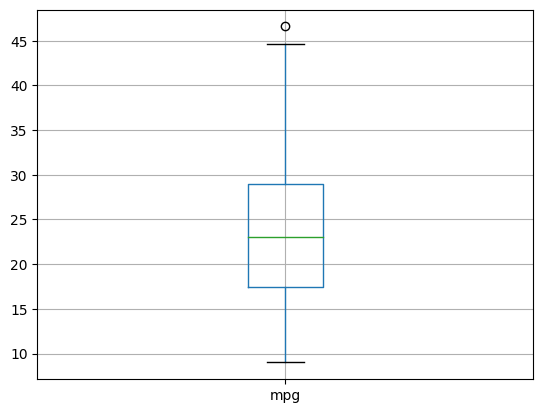

In [ ]:
carros.boxplot(column = 'mpg')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#Tomamos las variables predictoras en X y la variable a predecir en y
X = carros.drop('mpg', axis = 1)
y = carros['mpg']

#Hacemos la partición en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state= 1)

## Ridge

In [ ]:
#Instanciamos el modelo
model =Ridge()

#Creamos el diccionario
grid = dict(alpha = np.logspace(-4,2))

#Instanciamos la búsqueda
grid_search = GridSearchCV(estimator= model, param_grid = grid,
                           n_jobs= 1, cv = 5, scoring = 'neg_mean_squared_error')

#Generamos la búsqueda
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
#Mostramos el mejor RMSE con el hiperparámetro sintonizado
print(f'El mejor RMSE fue de {-grid_result.best_score_:.2f}, con un lambda de {grid_result.best_params_["alpha"]}')

El mejor RMSE fue de 12.88, con un lambda de 32.3745754281764


##Lasso

In [ ]:
#Para ignorar los warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importamos el modelo Lasso
from sklearn.linear_model import Lasso

#Inicializar la lista de coeficientes
coeficientes = []

#Definimos los posibles valores que puede tomar lambda (alpha)
alphas = [0, 0.01, 0.1, 1, 10, 100]

#Creamos el ciclo/bucle para la sintonización de lambda (alpha)
for i in alphas: #alpha es una variable temporal
  #Instanciamos el modelo
  model = Lasso(alpha = i)

  #Entrenamos el modelo
  model.fit(X_train, y_train)
  #Guardamos coeficientes
  coeficientes.append(model.coef_)

#Creamos una tabla con los coeficientes de las características para analizar la contribución de cada una de ellas a la regresión
df_lasso = pd.DataFrame(data = coeficientes,
                        columns = model.feature_names_in_,
                        index = alphas)

#Mostramos la tabla
df_lasso

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0.00,-0.394579,0.022756,-0.019285,-0.007056,0.064152,0.793118,1.191301
0.01,-0.346630,0.021702,-0.019314,-0.007046,0.059602,0.792189,1.157844
0.10,-0.000000,0.013601,-0.019558,-0.006954,0.019785,0.783488,0.866682
1.00,-0.000000,0.004737,-0.011075,-0.006872,0.000000,0.700973,0.000000
10.00,-0.000000,-0.004274,-0.013592,-0.006636,0.000000,0.000000,0.000000
100.00,-0.000000,-0.000000,-0.000000,-0.007517,0.000000,0.000000,0.000000


In [ ]:
#En este caso, entrenaremos con alpha = 0.1 y alpha = 1 para alpha = 0.1

model= Lasso(alpha = 0.10)

#Entrenamos el modelo
model.fit(X_train, y_train)

#Calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

#Mostramos el error
print(f'El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}')
print(f'El error cuadrático medio para el conjunto de prueba es {test_error:.2f}')

El error cuadrático medio para el conjunto de entrenamiento es 11.96
El error cuadrático medio para el conjunto de prueba es 9.23


*El de test es un poco menor, y en este caso hay un poquito de underfitting, el cual no es relevante pues es muy pequeño.

In [ ]:
#En este caso, entrenaremos con alpha = 0.1 y alpha = 1 para alpha = 1

model= Lasso(alpha = 1)

#Entrenamos el modelo
model.fit(X_train, y_train)

#Calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

#Mostramos el error
print(f'El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}')
print(f'El error cuadrático medio para el conjunto de prueba es {test_error:.2f}')

El error cuadrático medio para el conjunto de entrenamiento es 12.51
El error cuadrático medio para el conjunto de prueba es 9.99


*A menor alpha el modelo es más complejo

In [ ]:
#En este caso, entrenaremos con alpha = 0.1 y alpha = 0.01 para alpha = 0.01

model= Lasso(alpha = 0.01)

#Entrenamos el modelo
model.fit(X_train, y_train)

#Calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

#Mostramos el error
print(f'El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}')
print(f'El error cuadrático medio para el conjunto de prueba es {test_error:.2f}')

El error cuadrático medio para el conjunto de entrenamiento es 11.89
El error cuadrático medio para el conjunto de prueba es 8.97


*La profe se quedaría con este

*Aqui logramos ver que el error es más bajo

#Prepocesamiento como parte del flujo de trabajo en modelos lineales


Idealmente, el prepocesamiento se debe incluir en el *pipeline* de sintonización de hiperparámetros, pero para efectos ilustrativos lo haremos como una etapa anterior.  

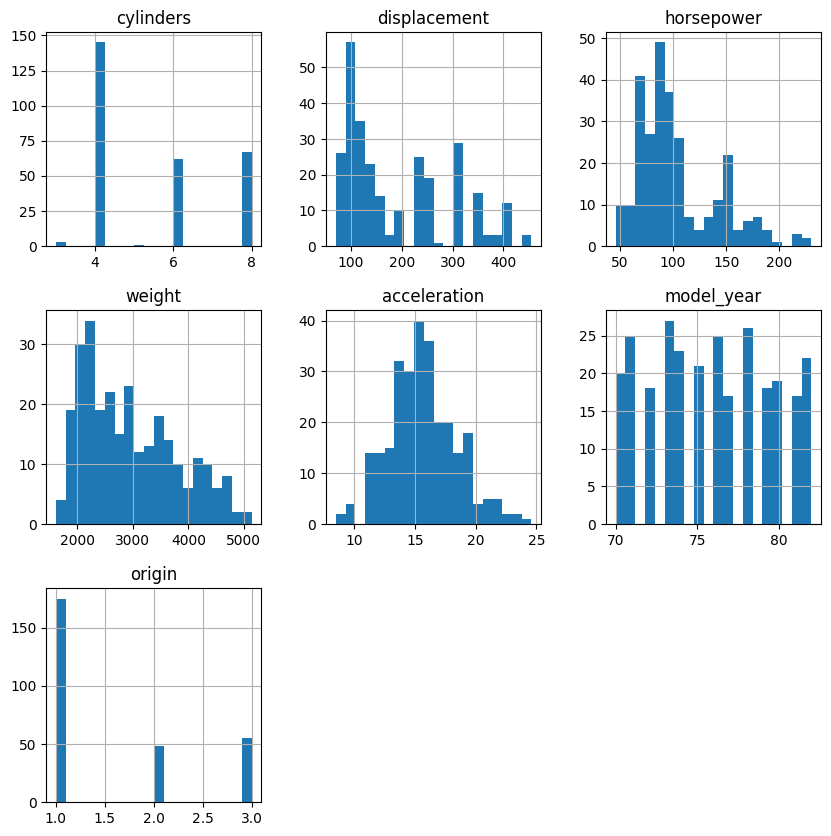

In [ ]:
#Revisamos los histogramas como aproximación a la distribución de propbabilidad de cada una de las características de entrenamiento (variables predictoras)
X_train.hist(figsize = (10,10), bins = 20);

**Apuntes: **
1. El **cilindraje** es discreto, esta es mejor trabajarlo con algo que no afecte la distribución de los datos. Se puede utilizar un mín y un máx.
2. El **displacement**, no es gaussiana, no tiene sesgo (no logaritmíca), no tiene outliers. Se puede utilizar un mín y un máx.
3. **Horsepower**, tamb
4. El **peso**, está sesgada hacia la derecha, en este caso es mejor aplicar una de los logarítmico.
5. **Aceleracion**, Logarítmicas o estandarización. Pero tiene más maracada una forma gaussiana, por ende es mejor estandarizar.
6. El **año del modelo**, es cualitativa.
7. El **origen** es discreto.

Las variables *cylinder*, y *origin* son consideradas discretas y es posible no aplicar ningún procesamiento.

Asimismo, el *model year*, se puede considerar discreto, pero dada su distribución se puede aplicar 'MinMaxScaler'.

La variable *weight* tiene una distribución por sesgo, por ello es mejor aplicar una transformación logarítmica.

Para el caso de la variable *aceleración* es un poco más conveniente aplicar una estandarización.

In [ ]:
#Definimos las librerias para el prepocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

#Instanciamos los prepocesadores
minmax = MinMaxScaler()
power = PowerTransformer()
scaler = StandardScaler()

#Definimos las listas de variables para cada uno de los casos
features_scaler = ['acceleration']
features_minmax = ['horsepower', 'model_year', 'displacement']
features_power = ['weight']

#Aplicamos el prepocesamiento
X_scaler = scaler.fit_transform(X[features_scaler])
X_minmax = minmax.fit_transform(X[features_minmax])
X_power = power.fit_transform(X[features_power])

#Concatenamos todas las variables nuevamente en una sola X
X_pre = np.concatenate((X_scaler, X_minmax, X_power, X[['origin']], X[['cylinders']]), axis = 1)

In [ ]:
#Aplicamos la regularización en la regresión como anteriormente
X_train_p, X_test_p, y_train, y_test = train_test_split(X_pre, y,
                                                    test_size= 0.3,
                                                    random_state= 1)

#Instanciamos el modelo
model = Lasso()

#Armamos el grid para escoger el lambda (alpha)
grid = dict(alpha = np.logspace(-4,2))

#Instanciamos la búsqueda
grid_search = GridSearchCV(estimator= model, param_grid = grid,
                           n_jobs= 1, cv = 5, scoring = 'neg_mean_squared_error')

#Generamos la búsqueda
grid_search.fit(X_train_p, y_train)

#Imprimimos el mejor score
print(f'El mejor RMSE fue de {-grid_search.best_score_:.2f}, con un lambda de {grid_search.best_params_["alpha"]}')

El mejor RMSE fue de 10.25, con un lambda de 0.009102981779915217


In [ ]:
#Calculamos la métrica con el conjunto test
test_error = mean_squared_error(y_test, grid_search.predict(X_test_p))

In [ ]:
test_error

8.239025060543286